In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
df=pd.read_csv("ToyotaCorolla1.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         1436 non-null   int64
 1   Age0804       1436 non-null   int64
 2   KM            1436 non-null   int64
 3   HP            1436 non-null   int64
 4   cc            1436 non-null   int64
 5   Doors         1436 non-null   int64
 6   Gears         1436 non-null   int64
 7   QuarterlyTax  1436 non-null   int64
 8   Weight        1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [4]:
df.head()

,Price,Age0804,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
df=df.rename(columns={"Age0804":"Age"})

In [6]:
df.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [7]:
df[df.duplicated()] # Prints duplicated rows

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [8]:
df=df.drop_duplicates() # to drop the duplicate rows

In [9]:
df.reset_index()

,index,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
df['Age']=df['Age'].astype('int8')
df['Price']=df['Price'].astype('int16')
df['KM']=df['KM'].astype('int32')

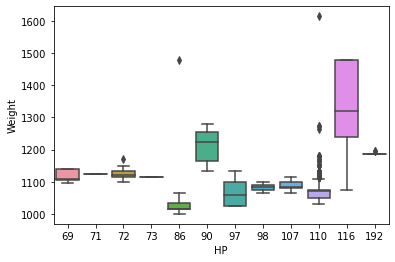

In [11]:
sns.boxplot(x='HP', y='Weight',data=df);

In [12]:
from sklearn.ensemble import IsolationForest

In [13]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df)

IsolationForest(contamination=0.01, random_state=10)

In [14]:
# predictions
y_pred_outliers = clf.predict(df)

In [15]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
df['Outliers']=y_pred_outliers

In [17]:
df['Outliers'].value_counts()

 1    1420
-1      15
Name: Outliers, dtype: int64

In [18]:
md=df.median()
md

Price            9900.0
Age                61.0
KM              63451.0
HP                110.0
cc               1600.0
Doors               4.0
Gears               5.0
QuarterlyTax       85.0
Weight           1070.0
Outliers            1.0
dtype: float64

In [19]:
df.mask(cond=(df.Outliers==-1), other=md, axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         1435 non-null   int16
 1   Age           1435 non-null   int8 
 2   KM            1435 non-null   int32
 3   HP            1435 non-null   int64
 4   cc            1435 non-null   int64
 5   Doors         1435 non-null   int64
 6   Gears         1435 non-null   int64
 7   QuarterlyTax  1435 non-null   int64
 8   Weight        1435 non-null   int64
 9   Outliers      1435 non-null   int32
dtypes: int16(1), int32(2), int64(6), int8(1)
memory usage: 126.2 KB


In [21]:
df=df.drop('Outliers',axis=1)

In [22]:
for i in df.columns[3:9]:
    df[i]=df[i].astype('int16')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         1435 non-null   int16
 1   Age           1435 non-null   int8 
 2   KM            1435 non-null   int32
 3   HP            1435 non-null   int16
 4   cc            1435 non-null   int16
 5   Doors         1435 non-null   int16
 6   Gears         1435 non-null   int16
 7   QuarterlyTax  1435 non-null   int16
 8   Weight        1435 non-null   int16
dtypes: int16(7), int32(1), int8(1)
memory usage: 70.1 KB


In [24]:
df.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
Price,1.000000,-0.882762,-0.567570,0.241549,0.101764,0.185683,-0.007790,0.133007,0.490958
Age,-0.882762,1.000000,0.490649,-0.107234,-0.080764,-0.142702,0.034046,-0.149016,-0.426233
KM,-0.567570,0.490649,1.000000,-0.337594,0.116099,-0.031036,0.039424,0.334887,0.039017
HP,0.241549,-0.107234,-0.337594,1.000000,0.017185,0.121883,0.068214,-0.371195,-0.006594
cc,0.101764,-0.080764,0.116099,0.017185,1.000000,0.076598,0.002078,0.299828,0.337783
Doors,0.185683,-0.142702,-0.031036,0.121883,0.076598,1.000000,-0.150530,0.094068,0.315451
Gears,-0.007790,0.034046,0.039424,0.068214,0.002078,-0.150530,1.000000,-0.012268,-0.036853
QuarterlyTax,0.133007,-0.149016,0.334887,-0.371195,0.299828,0.094068,-0.012268,1.000000,0.587414
Weight,0.490958,-0.426233,0.039017,-0.006594,0.337783,0.315451,-0.036853,0.587414,1.000000


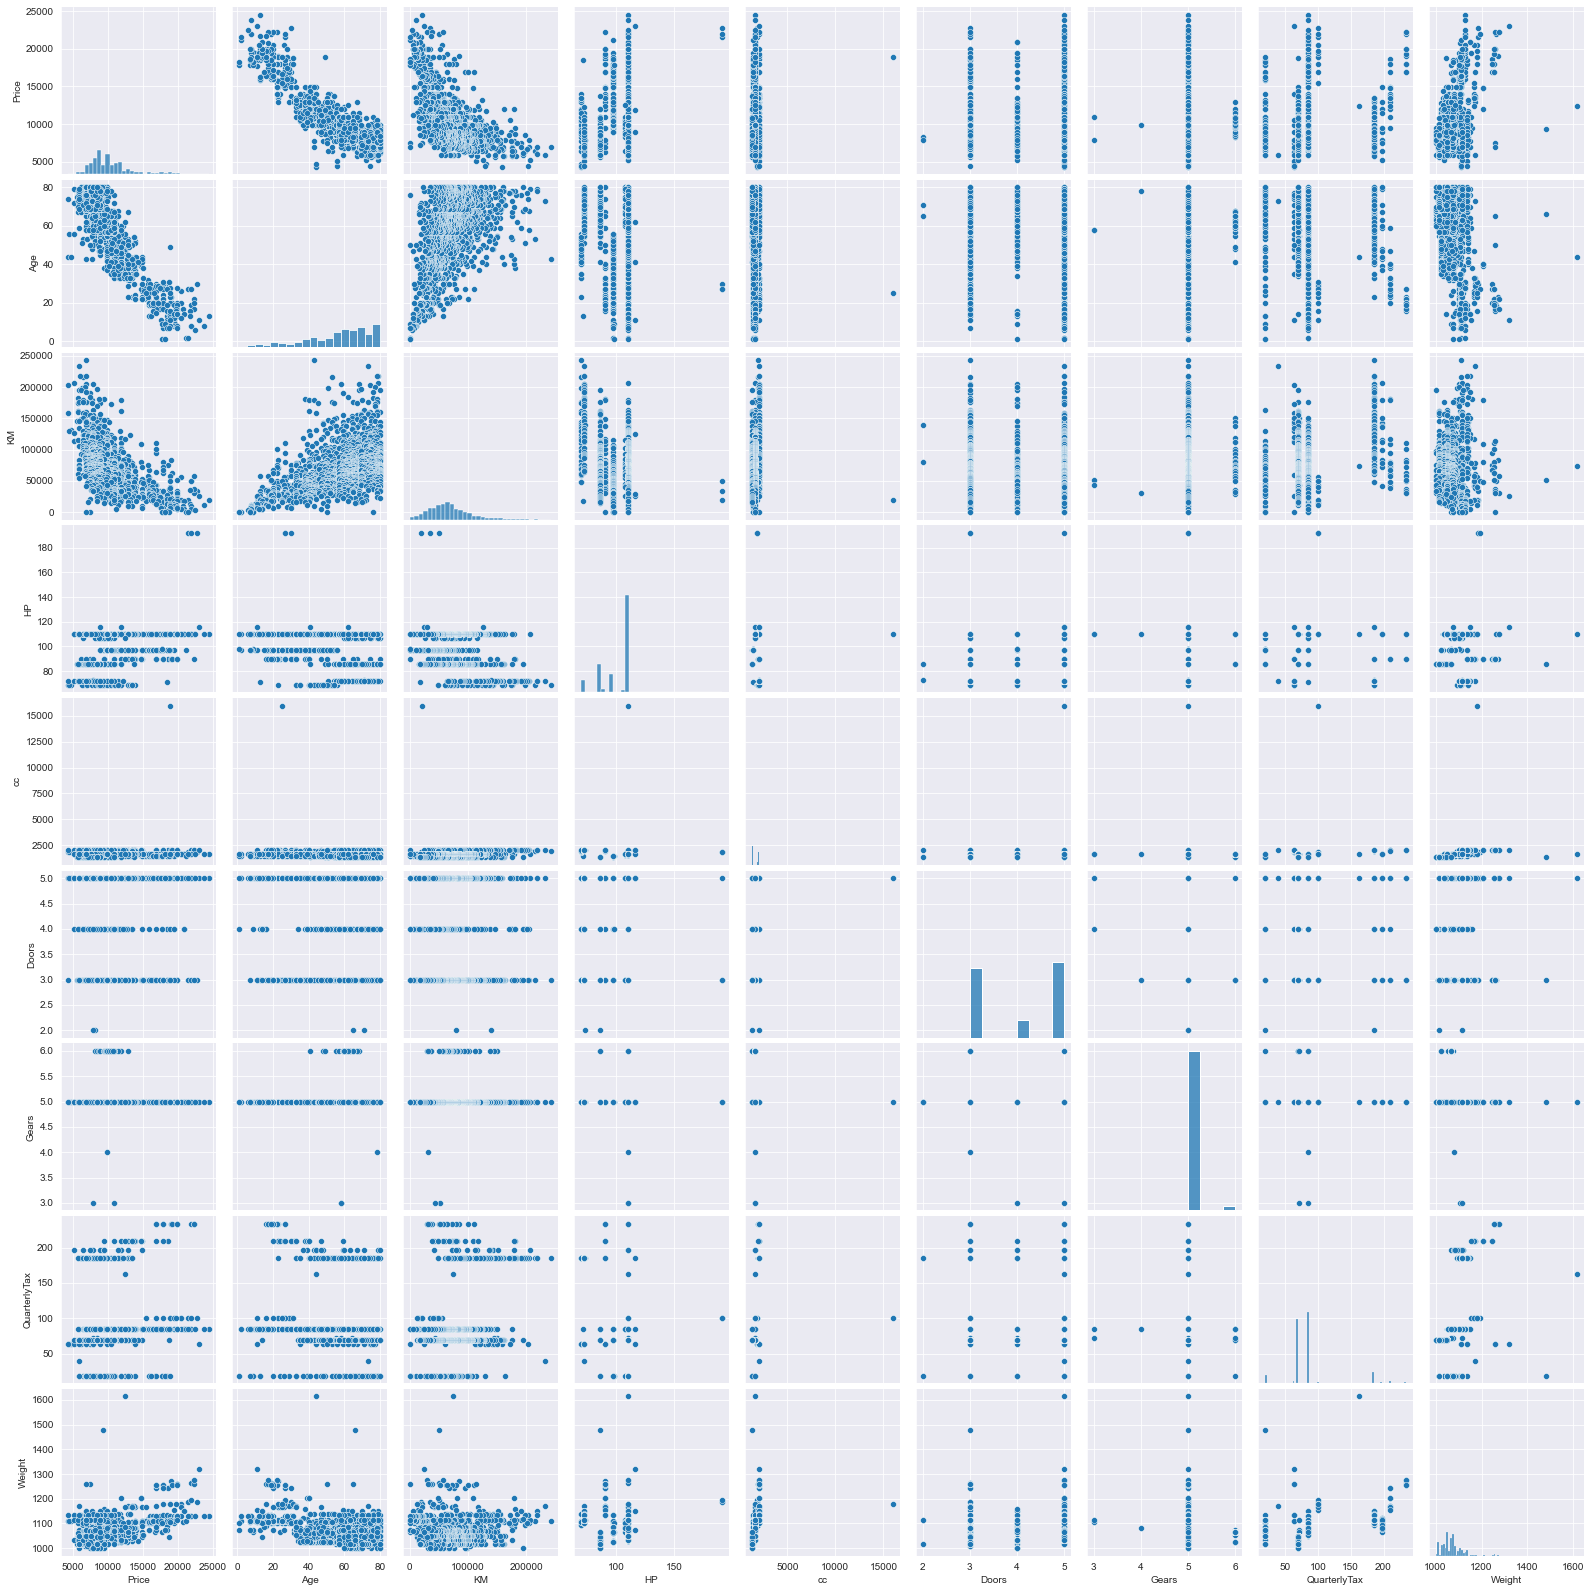

In [25]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

## Preparing a model

In [26]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=df).fit()


In [27]:
#Coefficients
model.params

Intercept      -1017.135617
Age             -123.987585
KM                -0.019406
HP                26.213940
cc                -0.037350
Doors             35.123291
Gears            482.680330
QuarterlyTax       2.744768
Weight            13.581391
dtype: float64

In [28]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept       -0.685819
Age            -48.686231
KM             -15.756478
HP               8.773630
cc              -0.426457
Doors            0.899572
Gears            2.431761
QuarterlyTax     2.141652
Weight          12.424294
dtype: float64 
 Intercept        4.929390e-01
Age             1.682904e-305
KM               1.090944e-51
HP               4.840968e-18
cc               6.698393e-01
Doors            3.684998e-01
Gears            1.514803e-02
QuarterlyTax     3.239050e-02
Weight           1.001642e-33
dtype: float64


In [29]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8471102961835265, 0.8462525699349067)

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     987.6
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:03:03   Log-Likelihood:                -12318.
No. Observations:                1435   AIC:                         2.465e+04
Df Residuals:                    1426   BIC:                         2.470e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1017.1356   1483.097     -0.686      0.493   -3926.422    1892.151
Age           -123.9876      2.547    -48.686      0.000    -128.983    -118.992
KM              -0.0194      0.001    -15.756      0.000      -0.022      -0.017
HP              26.2139      2.988      8.774      0.000      20.353      32.075
cc              -0.0373      0.088     -0.426      0.670      -0.209       0.134
Doors           35.1233     39.044      0.900      0.368     -41.467     111.714
Gears          482.6803    198.490      2.432      0.015      93.317     872.044
QuarterlyTax     2.7448      1.282      2.142      0.032       0.231       5.259
Weight          13.5814      1.093     12.424      0.000      11.437      15.726
==============================================================================
Omnibus:                      110.610   Durbin-Watson:                   1.566
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.358
Skew:                          -0.072   Prob(JB):                    3.14e-125
Kurtosis:                       6.093   Cond. No.                     3.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Variance Inflation Factor (VIF) Calculation

In [31]:
rsq_ag=smf.ols('Age~KM+HP+cc+Doors+Gears+QuarterlyTax+Weight', data=df).fit().rsquared
vif_ag = 1/(1-rsq_ag) #1.808

rsq_km=smf.ols('KM~Age+HP+cc+Doors+Gears+QuarterlyTax+Weight', data=df).fit().rsquared
vif_km = 1/(1-rsq_km) #1.781

rsq_hp=smf.ols('HP~Age+KM+cc+Doors+Gears+QuarterlyTax+Weight', data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp) #1.356

rsq_cc=smf.ols('cc~Age+KM+HP+Doors+Gears+QuarterlyTax+Weight', data=df).fit().rsquared
vif_cc = 1/(1-rsq_cc) #1.163

rsq_dr=smf.ols('Doors~Age+KM+HP+cc+Gears+QuarterlyTax+Weight', data=df).fit().rsquared
vif_dr = 1/(1-rsq_dr) #1.164

rsq_gr=smf.ols('Gears~Age+KM+HP+cc+Doors+QuarterlyTax+Weight', data=df).fit().rsquared
vif_gr = 1/(1-rsq_gr) #1.037

rsq_qr=smf.ols('QuarterlyTax~Age+KM+HP+cc+Doors+Gears+Weight', data=df).fit().rsquared
vif_qr = 1/(1-rsq_qr) #2.143

rsq_wt=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QuarterlyTax', data=df).fit().rsquared
vif_wt = 1/(1-rsq_wt) #2.215

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','QuarterlyTax','WeightP'],'VIF':[vif_ag,vif_km,vif_hp,vif_cc,vif_dr,vif_gr,vif_qr,vif_wt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,Age,1.808623
1,KM,1.780559
2,HP,1.355564
3,cc,1.168490
4,Doors,1.164394
5,Gears,1.036810
6,QuarterlyTax,2.142584
7,WeightP,2.215718


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

In [32]:
model.resid

0      -2921.383693
1      -2167.776614
2      -2449.763159
3      -1079.743177
4      -2036.057512
           ...     
1431   -1363.972425
1432    2458.841254
1433     -48.647986
1434   -1424.576178
1435   -3204.399858
Length: 1435, dtype: float64

C:\Users\ajith\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


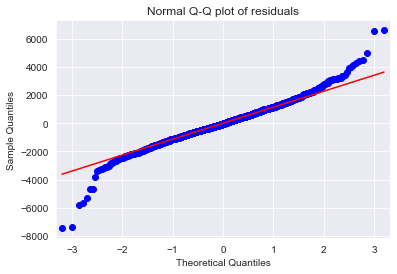

In [33]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [34]:
list(np.where(model.resid>6000)) 

[array([146, 522], dtype=int64)]

In [35]:
list(np.where(model.resid<-6000)) 

[array([220, 600], dtype=int64)]

## Residual Plot for Homoscedasticity

In [36]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

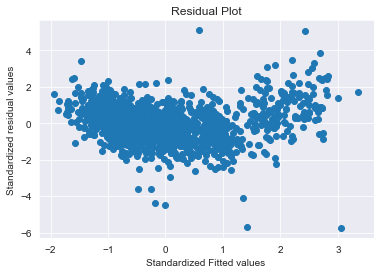

In [37]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual vs Regressors

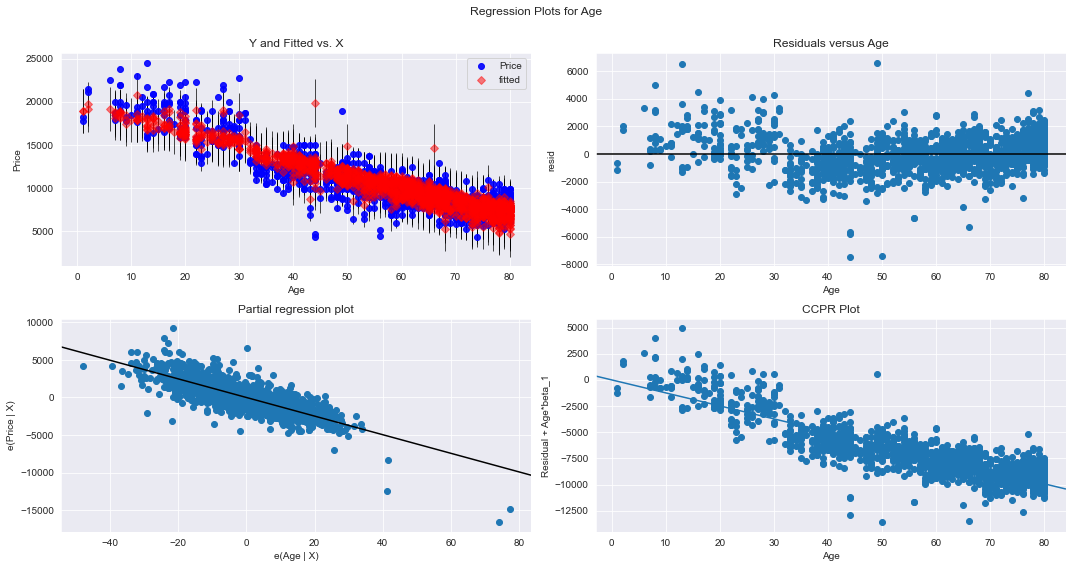

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

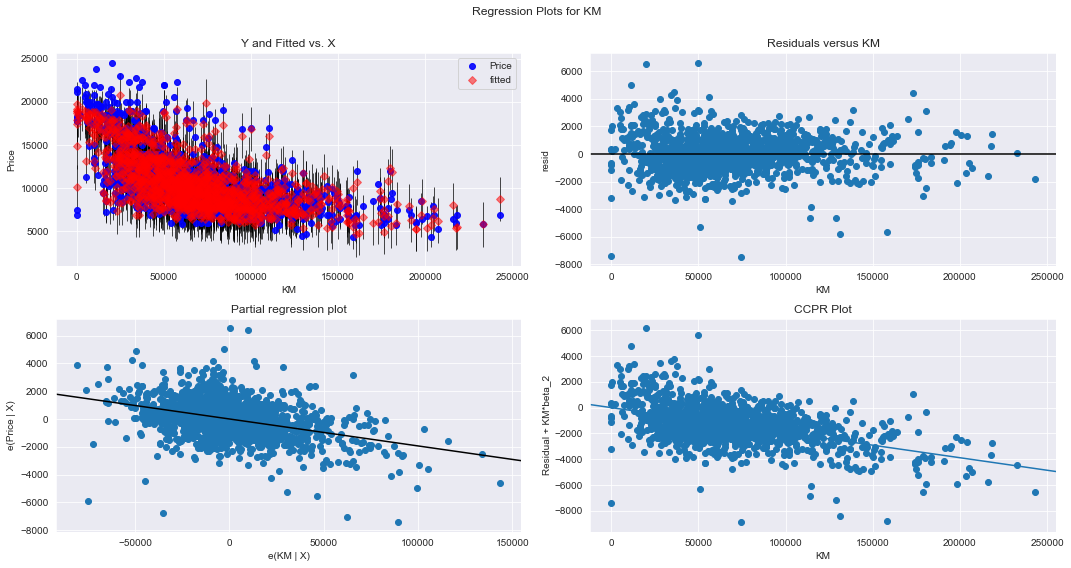

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

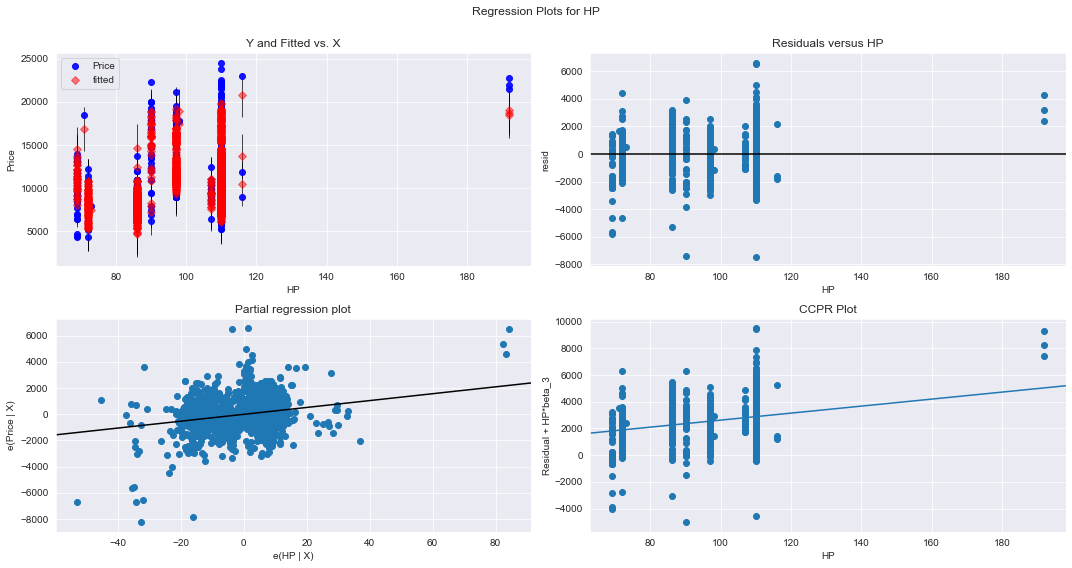

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

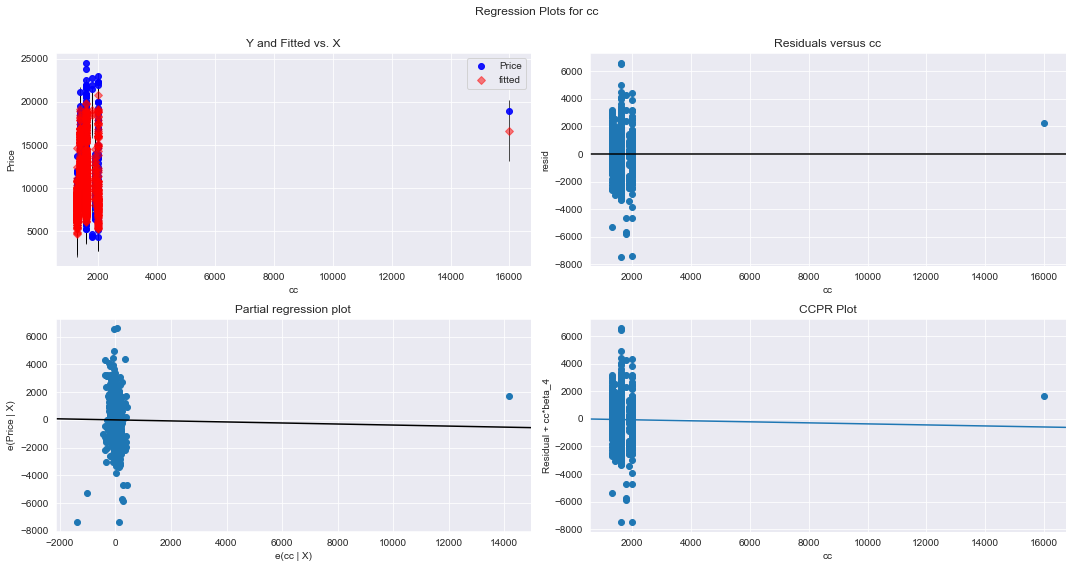

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

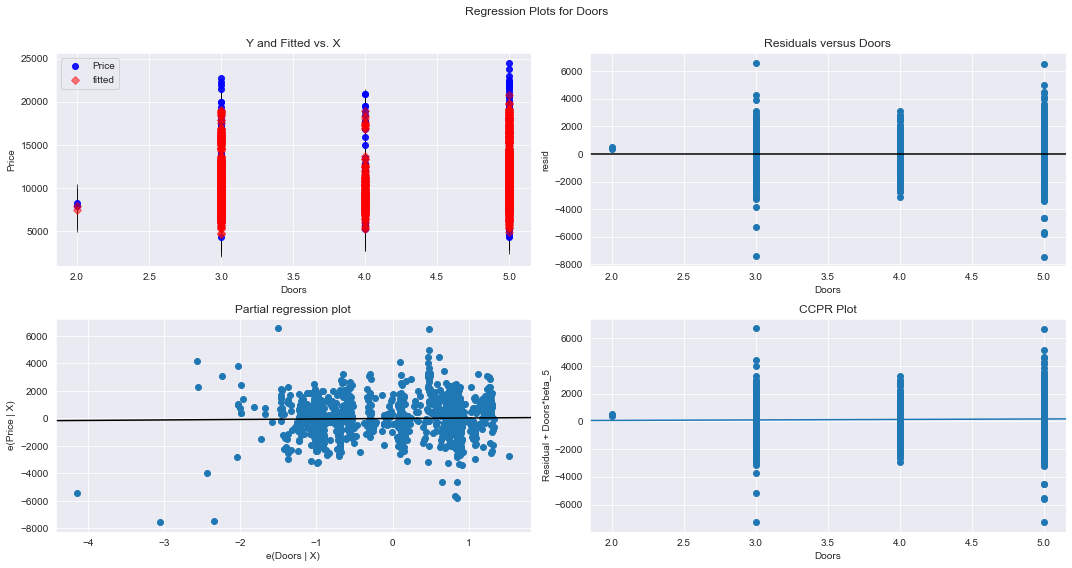

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

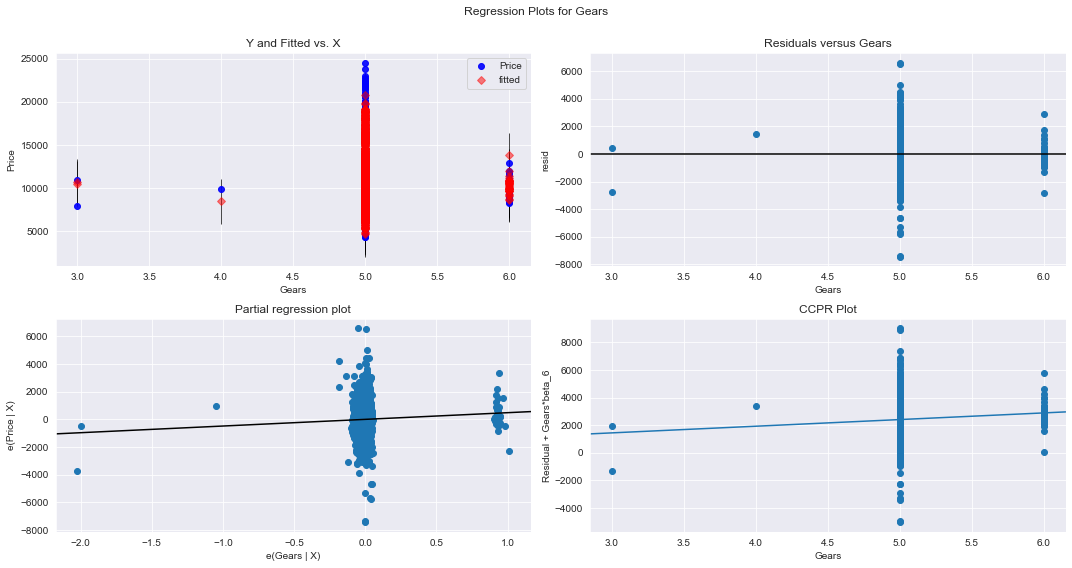

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

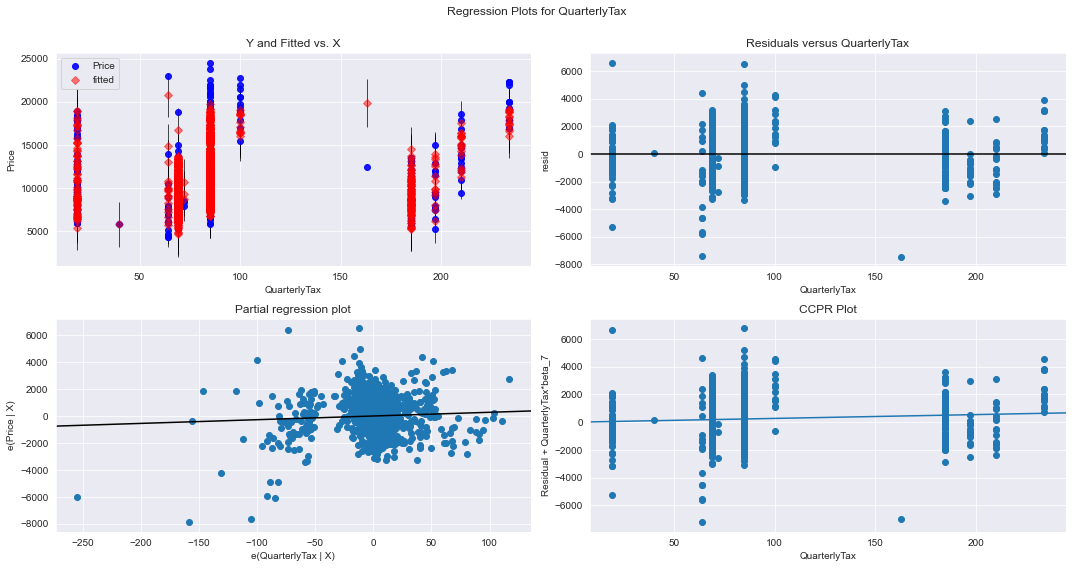

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QuarterlyTax", fig=fig)
plt.show()

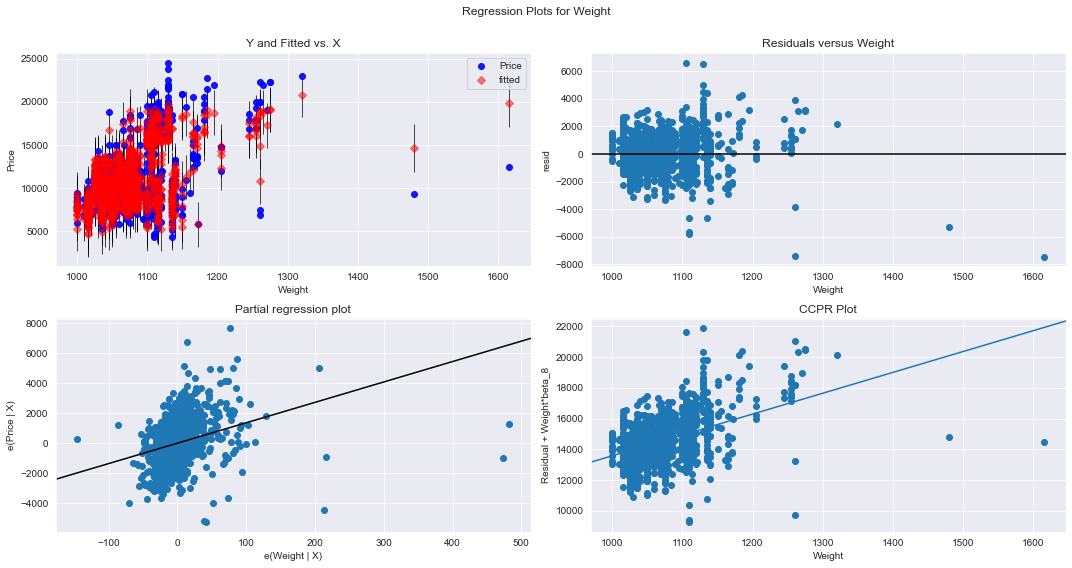

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [46]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

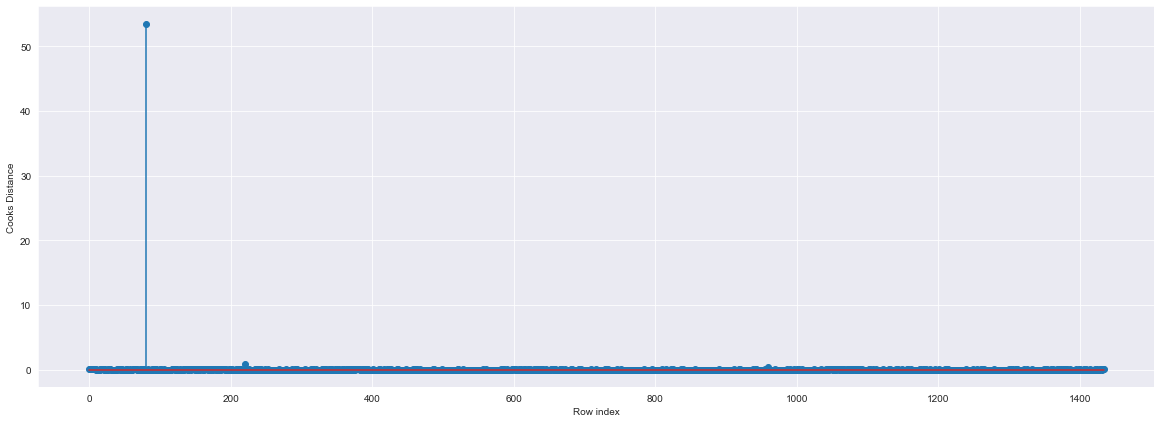

In [47]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 53.509999131203855)

## High Influence points

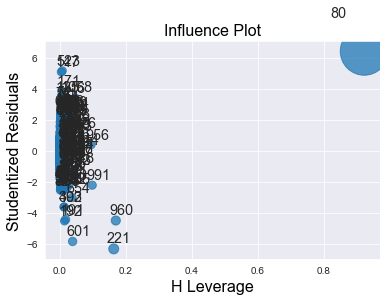

In [49]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [50]:
df.shape

(1435, 9)

In [51]:
#s=3*((10)/1435)
#s

In [52]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

#### From the above plot, it is evident that data point 80 is the influencer

In [53]:
df[df.index.isin([80,960,221])]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
80,18950,25,20019,110,16000,5,5,100,1180
221,12450,44,74172,110,1600,5,5,163,1615
960,9390,66,50806,86,1300,3,5,19,1480


In [54]:
df.head()

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Improving the model

In [55]:
#Discard the data points which are influencers 
df1=df.drop(df.index[[80,960,221]],axis=0).reset_index()
df1

,index,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1431,7500,69,20544,86,1300,3,5,69,1025
1428,1432,10845,72,19000,86,1300,3,5,69,1015
1429,1433,8500,71,17016,86,1300,3,5,69,1015
1430,1434,7250,70,16916,86,1300,3,5,69,1015


In [56]:
df1=df1.drop(['index'],axis=1) 

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         1432 non-null   int16
 1   Age           1432 non-null   int8 
 2   KM            1432 non-null   int32
 3   HP            1432 non-null   int16
 4   cc            1432 non-null   int16
 5   Doors         1432 non-null   int16
 6   Gears         1432 non-null   int16
 7   QuarterlyTax  1432 non-null   int16
 8   Weight        1432 non-null   int16
dtypes: int16(7), int32(1), int8(1)
memory usage: 26.7 KB


# Build Model

In [58]:
kf= smf.ols('Price~Age+HP+cc+Gears+QuarterlyTax+Weight', data=df1).fit()
kf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1171.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:03:26   Log-Likelihood:                -12361.
No. Observations:                1432   AIC:                         2.474e+04
Df Residuals:                    1425   BIC:                         2.477e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1625.6697   1569.872     -1.036      0.301   -4705.179    1453.839
Age           -140.3214      2.304    -60.907      0.000    -144.841    -135.802
HP              45.2653      3.191     14.186      0.000      39.006      51.525
cc              -3.0894      0.316     -9.783      0.000      -3.709      -2.470
Gears          328.1449    205.267      1.599      0.110     -74.512     730.802
QuarterlyTax     5.0776      1.508      3.366      0.001       2.119       8.037
Weight          17.0901      1.200     14.246      0.000      14.737      19.443
==============================================================================
Omnibus:                      151.970   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              930.340
Skew:                          -0.271   Prob(JB):                    9.53e-203
Kurtosis:                       6.911   Cond. No.                     8.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Cooks Distance

In [59]:
model_influence_V = kf.get_influence()
(c_V, _) = model_influence_V.cooks_distance

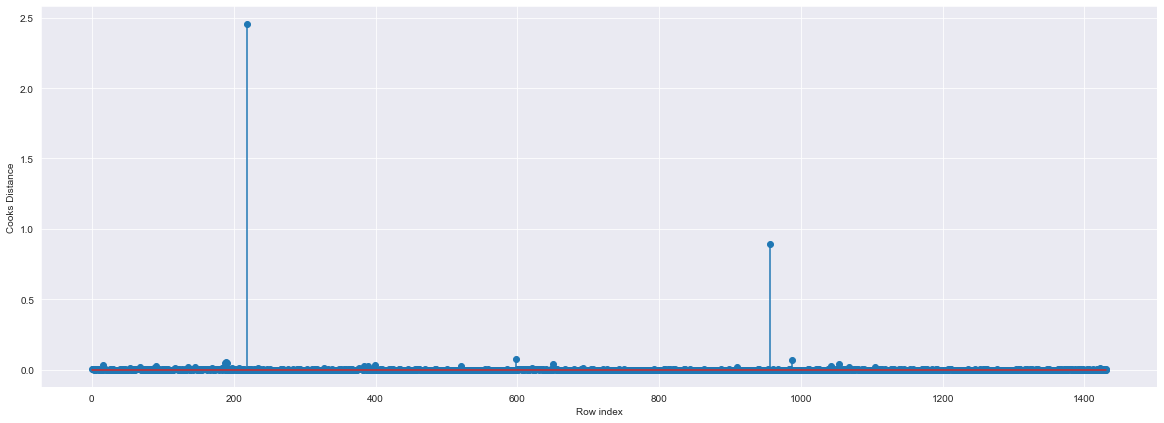

In [60]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [61]:
#index and value of influencer where c is more than .3
(np.argmax(c),np.max(c_V))

(80, 2.458832324032081)

In [62]:
model_influence1 = kf.get_influence()
(c_V1, _) = model_influence1.cooks_distance


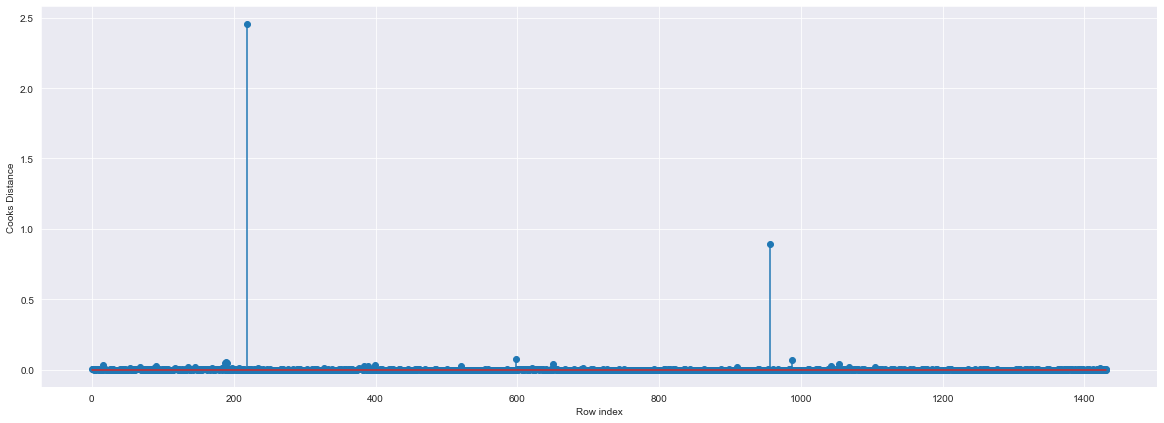

In [63]:
 

#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c_V1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

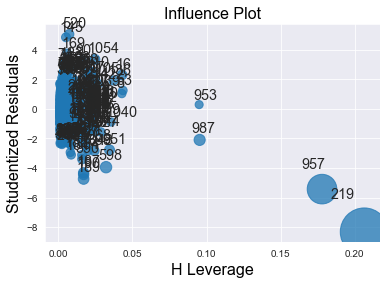

In [64]:
influence_plot(kf)
plt.show()

In [65]:
df1[df1.index.isin([953,987,957,219])]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
219,12450,44,74172,110,1600,5,5,163,1615
953,10950,58,51421,110,1600,5,3,85,1105
957,9390,66,50806,86,1300,3,5,19,1480
987,7950,58,43000,110,1600,4,3,72,1114


In [66]:
#Discard the data points which are influencers 
df2=df1.drop(df1.index[[953,987,957,219]], axis=0 ).reset_index()
df2

,index,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1423,1427,7500,69,20544,86,1300,3,5,69,1025
1424,1428,10845,72,19000,86,1300,3,5,69,1015
1425,1429,8500,71,17016,86,1300,3,5,69,1015
1426,1430,7250,70,16916,86,1300,3,5,69,1015


In [67]:
df2=df2.drop(['index'],axis=1) 

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         1428 non-null   int16
 1   Age           1428 non-null   int8 
 2   KM            1428 non-null   int32
 3   HP            1428 non-null   int16
 4   cc            1428 non-null   int16
 5   Doors         1428 non-null   int16
 6   Gears         1428 non-null   int16
 7   QuarterlyTax  1428 non-null   int16
 8   Weight        1428 non-null   int16
dtypes: int16(7), int32(1), int8(1)
memory usage: 26.6 KB


In [69]:
#Build Model

final1= smf.ols('Price~Age+KM+HP+cc+Gears+QuarterlyTax+Weight', data=df2).fit()
final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1301.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:03:31   Log-Likelihood:                -12168.
No. Observations:                1428   AIC:                         2.435e+04
Df Residuals:                    1420   BIC:                         2.439e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.075e+04   1640.619     -6.553      0.000    -1.4e+04   -7532.635
Age           -114.2088      2.501    -45.669      0.000    -119.114    -109.303
KM              -0.0170      0.001    -14.140      0.000      -0.019      -0.015
HP              32.8940      2.985     11.018      0.000      27.038      38.750
cc              -3.2562      0.313    -10.407      0.000      -3.870      -2.642
Gears          359.4730    204.033      1.762      0.078     -40.766     759.712
QuarterlyTax     4.6706      1.378      3.389      0.001       1.967       7.374
Weight          26.6502      1.357     19.639      0.000      23.988      29.312
==============================================================================
Omnibus:                      113.070   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.453
Skew:                           0.001   Prob(JB):                    8.35e-135
Kurtosis:                       6.221   Cond. No.                     4.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

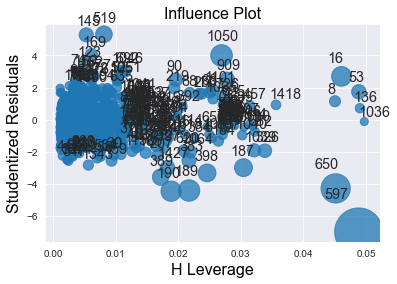

In [70]:
influence_plot(final1)
plt.show()

In [71]:
df2[df2.index.isin([8,16,53,136,1036,650,597,1418,187,1050,909,398])]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
8,21500,27,19700,192,1800,3,5,100,1185
16,22750,30,34000,192,1800,3,5,100,1185
53,21950,27,49866,192,1800,5,5,100,1195
136,23000,11,25000,116,2000,5,5,64,1320
187,7750,43,178858,110,1600,3,5,197,1084
398,5150,56,113997,72,2000,5,5,64,1135
597,7500,50,1,90,2000,3,5,64,1260
650,6950,65,114383,90,2000,3,5,64,1260
909,12950,67,58058,110,1600,3,6,85,1065
1036,5900,73,232940,72,2000,5,5,40,1172


In [74]:

#Discard the data points which are influencers 
df3=df2.drop(df2.index[[8,16,53,136,1036,650,597,1418,187,1050,909,398]],axis=0).reset_index()
df3

,index,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1411,1423,7500,69,20544,86,1300,3,5,69,1025
1412,1424,10845,72,19000,86,1300,3,5,69,1015
1413,1425,8500,71,17016,86,1300,3,5,69,1015
1414,1426,7250,70,16916,86,1300,3,5,69,1015


In [75]:
df3=df3.drop(['index'],axis=1) 

In [78]:
df3.head()

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [79]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         1416 non-null   int16
 1   Age           1416 non-null   int8 
 2   KM            1416 non-null   int32
 3   HP            1416 non-null   int16
 4   cc            1416 non-null   int16
 5   Doors         1416 non-null   int16
 6   Gears         1416 non-null   int16
 7   QuarterlyTax  1416 non-null   int16
 8   Weight        1416 non-null   int16
dtypes: int16(7), int32(1), int8(1)
memory usage: 26.4 KB


In [80]:

final2= smf.ols('Price~Age+KM+HP+cc+Gears+QuarterlyTax+Weight', data=df3).fit()
final2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1362.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:08:54   Log-Likelihood:                -12009.
No. Observations:                1416   AIC:                         2.403e+04
Df Residuals:                    1408   BIC:                         2.408e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.213e+04   1658.840     -7.310      0.000   -1.54e+04   -8872.433
Age           -112.5560      2.437    -46.186      0.000    -117.337    -107.775
KM              -0.0176      0.001    -14.960      0.000      -0.020      -0.015
HP              26.3090      3.166      8.309      0.000      20.098      32.520
cc              -3.0534      0.308     -9.926      0.000      -3.657      -2.450
Gears          345.4398    201.886      1.711      0.087     -50.590     741.469
QuarterlyTax     2.1866      1.441      1.517      0.129      -0.641       5.014
Weight          28.4871      1.387     20.544      0.000      25.767      31.207
==============================================================================
Omnibus:                       81.416   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.476
Skew:                           0.195   Prob(JB):                     8.29e-59
Kurtosis:                       5.093   Cond. No.                     4.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

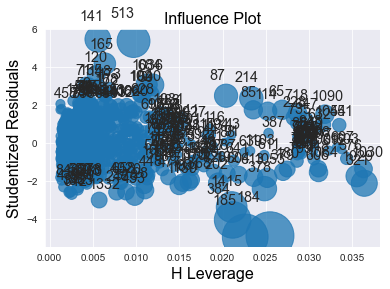

In [81]:
influence_plot(final2)
plt.show()

In [82]:
#Discard the data points which are influencers 
df4=df3.drop(df3.index[[1090,718,214,65,11,85,378,]],axis=0).reset_index()

In [83]:
df4=df4.drop(['index'],axis=1) 

In [84]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         1409 non-null   int16
 1   Age           1409 non-null   int8 
 2   KM            1409 non-null   int32
 3   HP            1409 non-null   int16
 4   cc            1409 non-null   int16
 5   Doors         1409 non-null   int16
 6   Gears         1409 non-null   int16
 7   QuarterlyTax  1409 non-null   int16
 8   Weight        1409 non-null   int16
dtypes: int16(7), int32(1), int8(1)
memory usage: 26.3 KB


In [85]:

final3= smf.ols('Price~Age+KM+HP+cc+Gears+QuarterlyTax+Weight', data=df4).fit()
final3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1350.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:12:25   Log-Likelihood:                -11942.
No. Observations:                1409   AIC:                         2.390e+04
Df Residuals:                    1401   BIC:                         2.394e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.148e+04   1672.361     -6.866      0.000   -1.48e+04   -8201.569
Age           -112.9918      2.431    -46.482      0.000    -117.760    -108.223
KM              -0.0173      0.001    -14.726      0.000      -0.020      -0.015
HP              26.4211      3.223      8.197      0.000      20.098      32.744
cc              -3.0630      0.311     -9.849      0.000      -3.673      -2.453
Gears          291.8265    203.605      1.433      0.152    -107.577     691.230
QuarterlyTax     2.0742      1.484      1.398      0.162      -0.837       4.985
Weight          28.1473      1.395     20.176      0.000      25.411      30.884
==============================================================================
Omnibus:                       85.834   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.185
Skew:                           0.207   Prob(JB):                     3.57e-64
Kurtosis:                       5.192   Cond. No.                     4.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

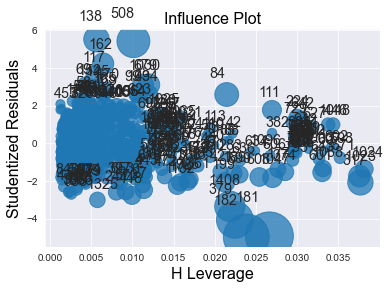

In [86]:
influence_plot(final3)
plt.show()

In [87]:
#Discard the data points which are influencers 
df5=df4.drop(df4.index[[111,181,182,382]],axis=0).reset_index()

In [88]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   index         1405 non-null   int64
 1   Price         1405 non-null   int16
 2   Age           1405 non-null   int8 
 3   KM            1405 non-null   int32
 4   HP            1405 non-null   int16
 5   cc            1405 non-null   int16
 6   Doors         1405 non-null   int16
 7   Gears         1405 non-null   int16
 8   QuarterlyTax  1405 non-null   int16
 9   Weight        1405 non-null   int16
dtypes: int16(7), int32(1), int64(1), int8(1)
memory usage: 37.2 KB


In [89]:
df5=df5.drop(['index'],axis=1) 

In [90]:

final4= smf.ols('Price~Age+KM+HP+cc+Gears+QuarterlyTax+Weight', data=df5).fit()
final4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1384.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:14:41   Log-Likelihood:                -11883.
No. Observations:                1405   AIC:                         2.378e+04
Df Residuals:                    1397   BIC:                         2.382e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.151e+04   1648.072     -6.982      0.000   -1.47e+04   -8273.516
Age           -114.1917      2.394    -47.695      0.000    -118.888    -109.495
KM              -0.0167      0.001    -14.413      0.000      -0.019      -0.014
HP              22.5249      3.243      6.946      0.000      16.164      28.886
cc              -2.7999      0.310     -9.035      0.000      -3.408      -2.192
Gears          303.3921    200.023      1.517      0.130     -88.986     695.771
QuarterlyTax     0.0190      1.501      0.013      0.990      -2.925       2.963
Weight          28.2944      1.378     20.539      0.000      25.592      30.997
==============================================================================
Omnibus:                       83.920   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.480
Skew:                           0.338   Prob(JB):                     6.53e-45
Kurtosis:                       4.737   Cond. No.                     4.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

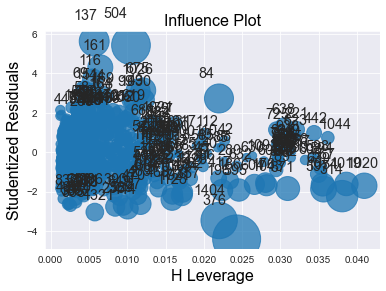

In [91]:
influence_plot(final4)
plt.show()

### while we may want to improve the predictive capacity of the model, excluding influential data points may not necessarily be what we want. For example, if the purpose of the model is the identification of those extreme, influential instances, say for example strike in factory,machine failure etc removing these points will make our model not learn what features lead to these influential instances and hence we can accept the last model which is final4 , also the R square and adjusted R square are close to each other and has improved a lot from 83% to 87.
### We have improved our model by removing the influencial points which were beyond 0.040 as our leverage cutoff is 0.02.